In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [13]:
# Clean data
df=df[
    (df["value"]>=df["value"].quantile(0.025)) &
    (df["value"]<=df["value"].quantile(0.975))
]
df

,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-29,27734
2016-06-30,26696
2016-07-01,28372
...,...
2019-11-09,115642
2019-11-10,117717
2019-11-16,125634


In [28]:
def draw_line_plot():
    # Draw line plot
 fig,ax = plt.subplots(figsize=(12,6))
 ax.plot(df.index,df["value"],linewidth=2,color='green')
 ax.set_xlabel("Date")
 ax.set_ylabel("Page Views")
 ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    # Save image and return fig (don't change this part)
#     fig.savefig('line_plot.png')
#     return fig


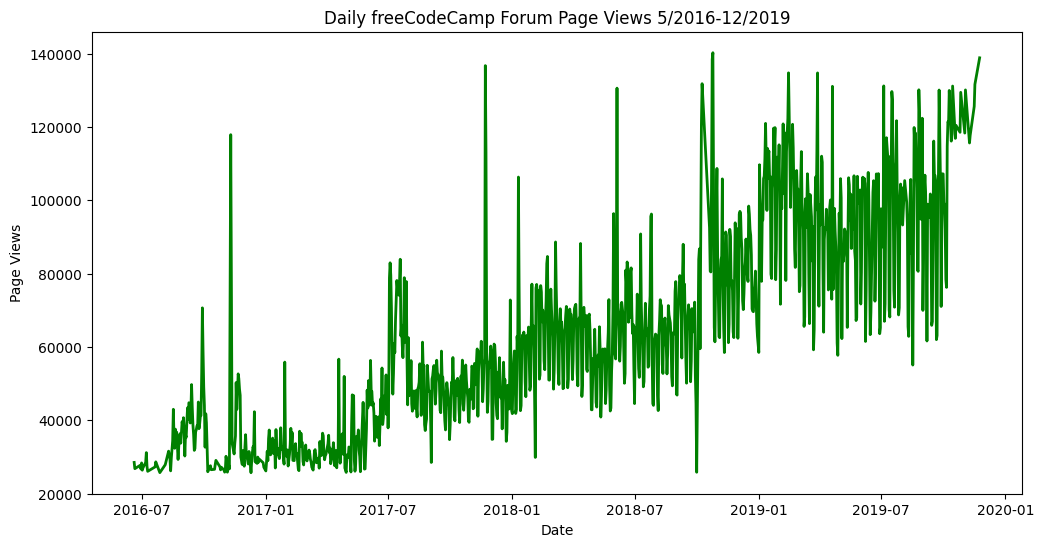

In [29]:
draw_line_plot()

In [59]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df.copy()
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.month


    # Draw bar plot
  
    df_bar=df_bar.groupby(["year","month"])["value"].mean()
    df_bar=df_bar.unstack()
    fig = df_bar.plot(legend=True,kind="bar",figsize=(12,6),ylabel="Average Page Views",xlabel="Years")
    plt.legend(["January","February","March","April","May","June","July",
                "August","September","October","November","December"])
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    # Save image and return fig (don't change this part)
#     fig.savefig('bar_plot.png')
#     return fig


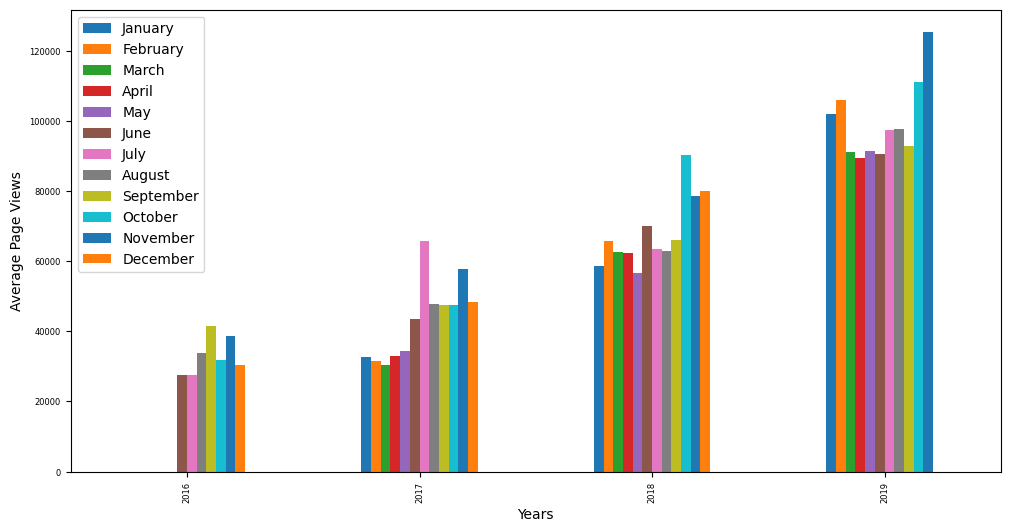

In [60]:
draw_bar_plot()

In [108]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,10))
    sns.boxplot(ax=ax1,x="year",y="value",data=df_box)
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    sns.boxplot(ax=ax2,x="month",y="value",data=df_box,order=["Jan",
                "Feb","Mar","Apr","May","Jun","Jul","Aug",
                "Sep","Oct","Nov","Dec"])
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")   

    # Save image and return fig (don't change this part)
#     fig.savefig('box_plot.png')
#     return fig


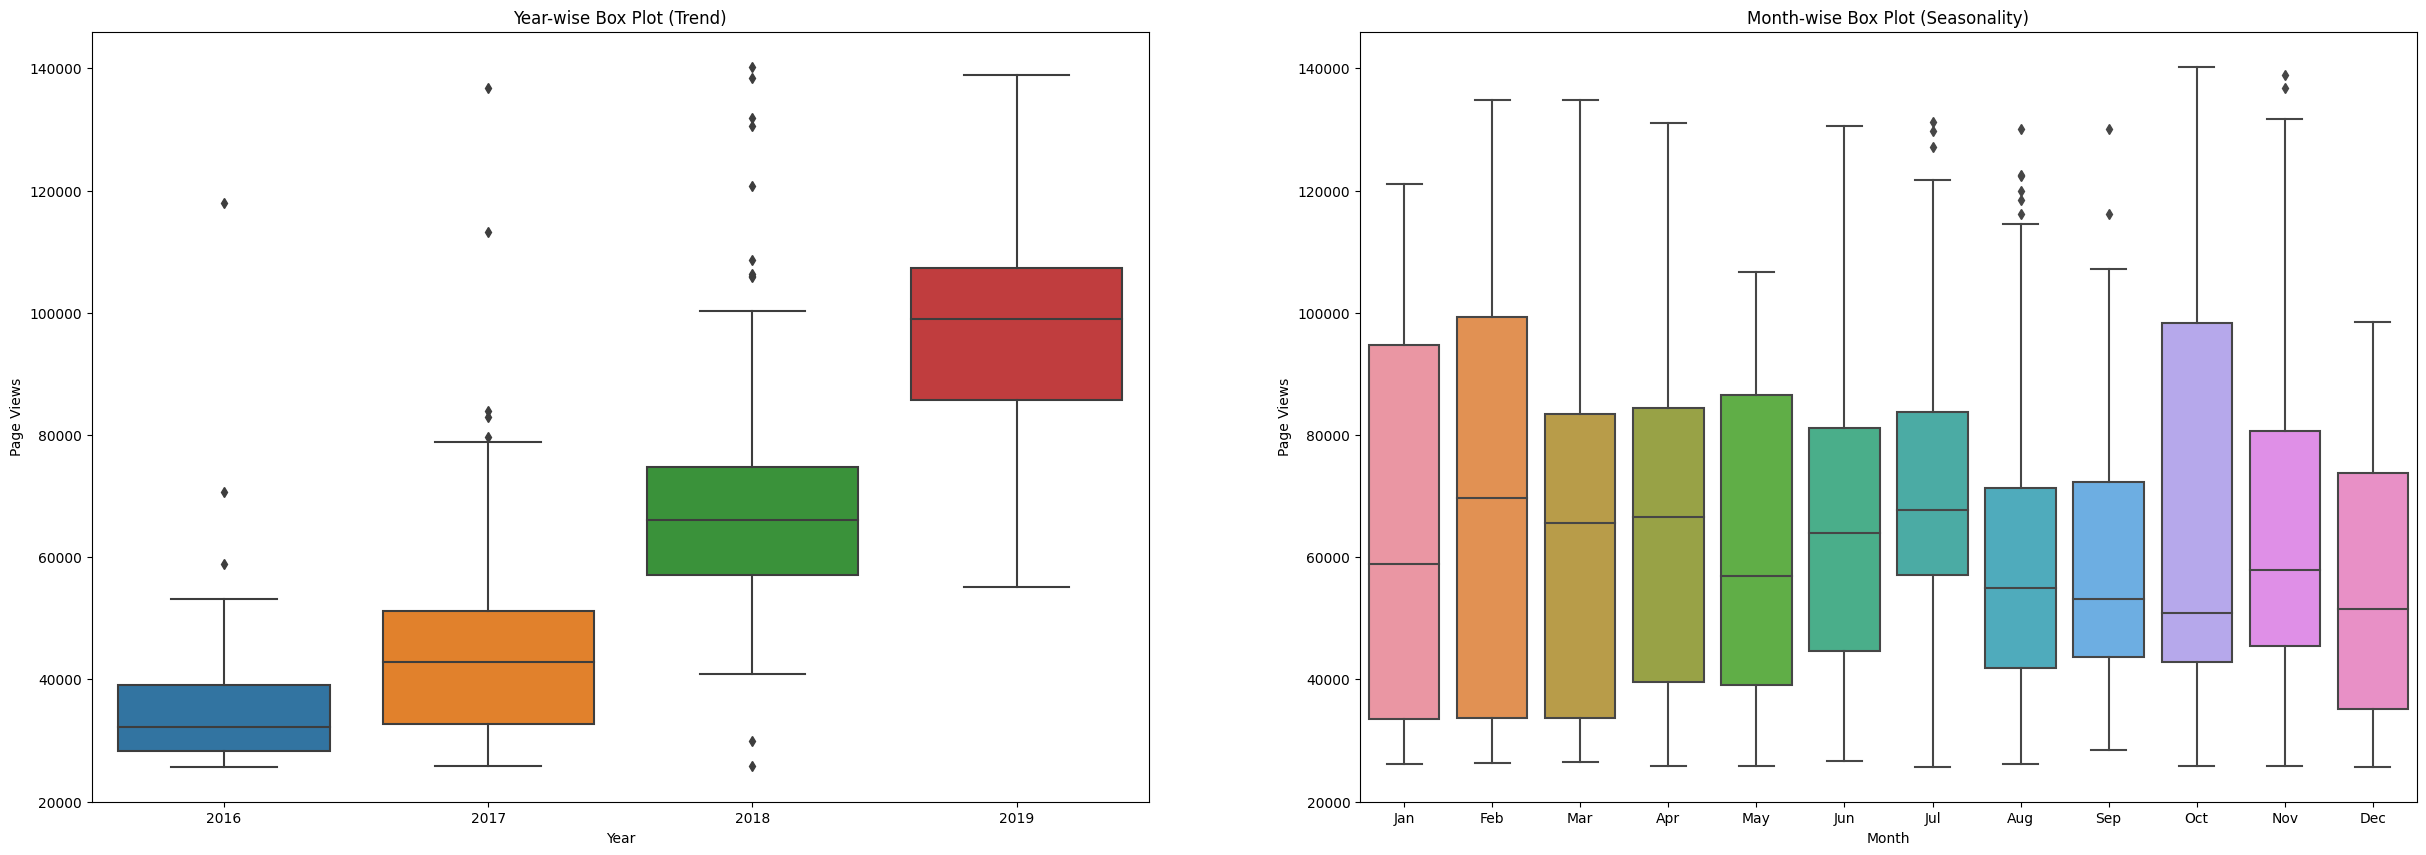

In [109]:
draw_box_plot()